
# Práctica de Laboratorio 3 — Análisis de Series Temporales

**Asignatura:** Análisis de Series Temporales  
**Curso:** 2025–2026  

**Autores:**  
Marius Marinescu  
Vanesa Gómez Martínez  
Cristian David Chushig Muzo  
Eva Milara Hernando  

**Afiliación:**  
Universidad Rey Juan Carlos  
Departamento de Teoría de la Señal y Comunicaciones y Sistemas Telemáticos y Computación  

## Objetivo general

El objetivo de esta práctica es aplicar los conceptos fundamentales estudiados en:

- Técnicas de procesamiento de señales (análisis espectral).  
- Técnicas de suavizado y filtrado.

En particular, la práctica consta de dos bloques principales:

- Métodos para obtener una representación espectral adecuada de series temporales mediante periodogramas, ventanas, Welch y modelos paramétricos.
- Técnicas de suavizado y filtrado orientadas a la estimación de tendencia y estacionalidad en datos reales.

El cuaderno combina simulación, visualización e interpretación estadística, y está diseñado como material docente en acceso abierto.

---

## Estructura

1. Análisis espectral de series temporales  
2. La densidad espectral de un ARMA: polos y ceros  
3. Técnicas de suavizado y filtrado  

---


---
# <center> Práctica III | Parte A </center>
---

<div align="center">
  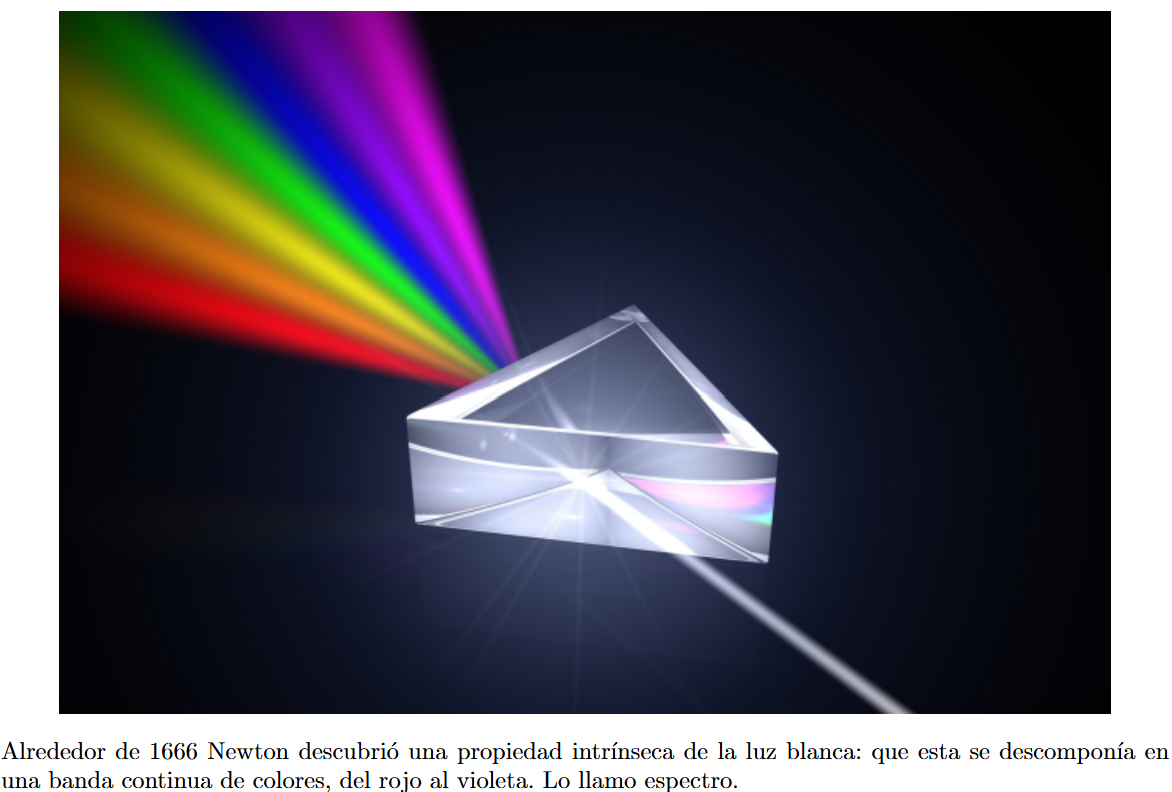
</div>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### Split a cell: Ctrl + M + -
import sys
from pathlib import Path

# IMPORTANT: Replace this with the ACTUAL path to your 'functions' folder in Google Drive.
notebook_dir = Path('/content/drive/MyDrive/Colab Notebooks/AST/Practica III Spectrum/')
functions_path = notebook_dir / 'functions'

# Add the subfolder to sys.path
sys.path.insert(0, str(functions_path))

# Now you can import from the module inside the subfolder
# Assuming 'KF_fun.py' exists in your 'functions' subfolder
# from Ej_1_functions import predictor_polynomial
###


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon import ARMA

## Representar y comparar densidad espectral y periodograma

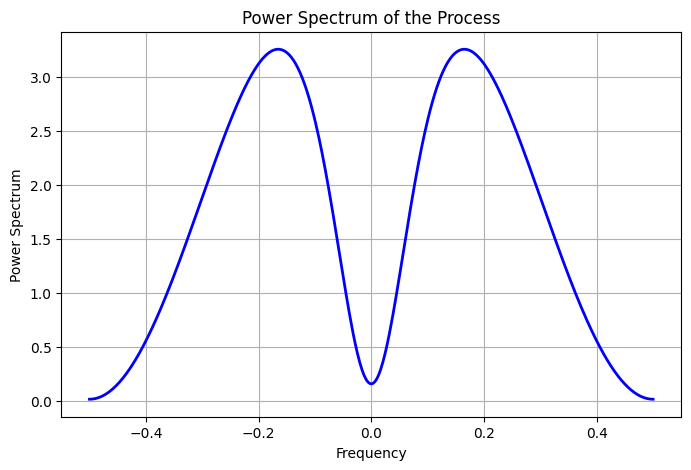

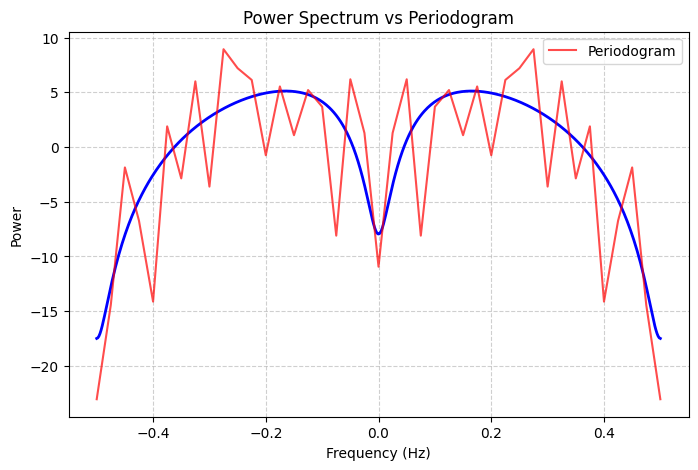

In [7]:
np.random.seed(123)  # fix the seed

# Se podria usar statsmodels para arma tambien pero se usa quantecon para
# poder representar distintos estimadores de la densidad espectral
# El ejemplo viene de la libreria:
# https://python-advanced.quantecon.org/estspec.html

n = 40                         # n samples for time serie
phi, theta = 0.5, (0, -0.8)     # AR and MA parameters
dB = 0 # dB scale
flag = 1 # all domain or half
sig2 = 1 # white noise var
lp = ARMA(phi, theta, sigma = sig2)           # define arma process
y = lp.simulation(ts_length=n)  # simulate time series with 40 samples

# Represent the theoretic power spectrum

#sig2 = lp.autocovariance(num_autocov=1)
omega = np.linspace(-np.pi, np.pi, 512)
Az = np.abs(1-phi*np.exp(-1j*omega))**2  # 1j = imaginary unit
Cz = np.abs(1+theta[1] * np.exp(-2j*omega))**2
f_spec = sig2  *  Cz / Az # * (1/(2*np.pi))

plt.figure(figsize=(8, 5))
plt.plot(omega/(2*np.pi), f_spec, color='blue', lw=2)
plt.xlabel("Frequency")
plt.ylabel("Power Spectrum")
plt.title("Power Spectrum of the Process")
plt.grid(True)
plt.show()

# Represent the empirical power spectrum (periodogram)

from numpy.fft import fft, fftfreq

# fourier = fft(y)
# f_spec2 = (1/n) * np.abs(fourier)**2  # periodogram

def periodogram(x, flag = 0):
    n = len(x)
    I_w = np.abs(fft(x))**2 / n
    w = 2 * np.pi * np.arange(n) / n  # Fourier frequencies
    w, I_w = w[:int(n/2)+1], I_w[:int(n/2)+1]  # Take only values on [0, pi]

    if flag ==1: # full domain
        w = np.concatenate([-w[::-1], w])
        I_w = np.concatenate([I_w[::-1], I_w])
    return w, I_w

w , f_spec2 = periodogram(y, flag = flag)

# Plot
plt.figure(figsize=(8,5))

if dB ==1:
    plt.plot(omega/(2*np.pi), 10 * np.log10(f_spec), color='blue', lw=2)
    plt.plot(w/(2*np.pi), 10 * np.log10(f_spec2), lw=1.5, color='red', alpha=0.7, label='Periodogram')
else:
    plt.plot(omega/(2*np.pi), 10 * f_spec, color='blue', lw=2)
    plt.plot(w/(2*np.pi), 10 * f_spec2, lw=1.5, color='red', alpha=0.7, label='Periodogram')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.title("Power Spectrum vs Periodogram")
plt.legend()
plt.grid(True, ls='--', alpha=0.6)
plt.show()

P1

**¿Qué transformación hay que hacer a los resultados de $\texttt{fft}$ para obtener el periodograma?**

Tomar el modulo al cuadrado y dividir por n.

P2

**Representa el periodograma y compáralo con la densidad espectral teórica. ¿Es buena la estimación?**

No. Es muy ruidosa y no se observa bien la curva.

P3

**Aumenta el número de observaciones (de manera paultina) y vuelve a representar el periodograma. ¿Va mejorando la estimación? ¿Converge a los valores teóricos dados por la función espectral?**

La estimación no mejora especialmente. No, no converge (esto lo sabemos también por teoría, el periodograma no es un estimador consistente).

P4

**Repite el paso anterior representado el periodograma en la escala de decibelios (dB): $I_\text{dB}= 10 \log_{10}(I)$. ¿Se observa mejor la similitud? ¿Qué efecto tiene el logaritmo?**

*Large peaks are compressed, and small values are stretched. Thus, relative differences are easier to see. The spectrum looks smoother and more interpretable, even though it is still noisy.*

*Conclusion: logarithmic scale compresses large differences in power and emphasizes structure across the whole spectrum.*

## Mejorando el periodograma | OPCIONAL

**** Periodogram
RMSE 5.620422057479013
VAR 5.5031567861613375
BIAS 0.34244017188068987
****
**** Hanning
RMSE 6.016852915190637
VAR 5.901934603969031
BIAS 0.3389960342269562
****
**** Hamming
RMSE 5.810232349092946
VAR 5.69792745859706
BIAS 0.3351192183326493
****
**** Bartlett
RMSE 5.981239913128933
VAR 5.834828484445385
BIAS 0.38263746377419466
****
**** Blackman
RMSE 7.372837441364237
VAR 7.220805156292768
BIAS 0.3899131763245084
****


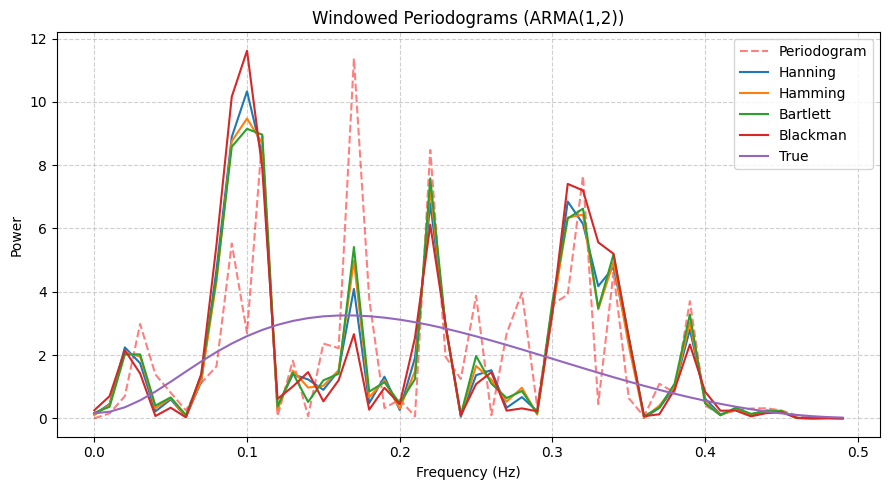

In [8]:
import quantecon as qe
from quantecon import smooth
from numpy.fft import fft, fftfreq
from scipy.signal import get_window

# -----------------------------
# Parameters
# -----------------------------
np.random.seed(123)
n = 100
phi = [.5]
theta = [0.0, -0.8]
sigma = 1.0
dt = 1.0
dB = 0

# -----------------------------
# Simulate ARMA(1,2) process
# -----------------------------
arma = qe.ARMA(phi, theta, sigma)
x = arma.simulation(ts_length=n)

# Frequency grid
freq = fftfreq(n, d=dt)
mask = freq >= 0
freq = freq[mask]


# True spectrum
omega = freq * 2 * np.pi
Az = np.abs(1-phi*np.exp(-1j*omega))**2  # 1j = imaginary unit
Cz = np.abs(1+theta[1] * np.exp(-2j*omega))**2
f_spec = sigma**2  *  Cz / Az # * (1/(2*np.pi))

# -----------------------------
# Window definitions
# -----------------------------
windows = {
    "Periodogram": np.ones(n), # The idea for the flat is that the observed process
    # can be seen as aplying a rectangular window to the infinite one.
    "Hanning": np.hanning(n),
    "Hamming": np.hamming(n),
    "Bartlett": np.bartlett(n),
    "Blackman": np.blackman(n)
}


# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(9, 5))

for name, w in windows.items():
    xw = x * w  # windows weights
    X = fft(xw)
    scale = 1.0 / np.sum(w**2) # Important scale changes 1/ wi \int f*w
    S = scale * np.abs(X)**2
    S = S[mask]

    rmse = np.average( np.abs(S-f_spec)**2 )
    var  = np.var(S-f_spec)
    bias = np.average(S-f_spec)
    print('****', name)
    print('RMSE', rmse), print('VAR', var), print('BIAS', bias), print('****')

    # Convert to dB (avoid log(0))
    if dB ==1:
        S = 10 * np.log10(S + 1e-12)
        f_spec = 10 * np.log10(f_spec + 1e-12)
        plt.ylabel("Power (dB) ")

    if name == "Periodogram":
     plt.plot(freq, S ,lw=1.5, ls="--",
             color='red', alpha=0.5, label=name)
    else:
        plt.plot(freq, S, label=name)

plt.plot(freq,  f_spec, label = "True")
#plt.plot(freq,  f_spec, label = "True")

plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.title("Windowed Periodograms ARMA(1,2)")
plt.legend()
plt.grid(True, ls="--", alpha=0.6)
plt.tight_layout()
plt.show()



P

**¿Qué técnica te parece más efectiva para estimar el espectro del proceso ARMA(1,2) trabajado? Argumenta tu respuesta.**

Respuesta libre.

Posibles respuestas: reduce más picos, reduce RMSE, reduce var, reduce bias, ...

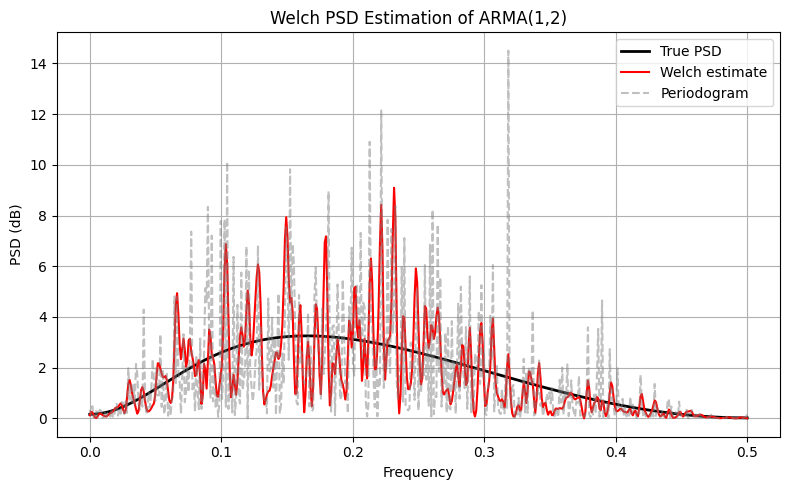

**** Periodogram
RMSE 3.3245874231390222
VAR 3.3245604676654965
BIAS -0.005191866092826802
****
**** Welch + Hann or selected
RMSE 1.5029787638659582
VAR 1.5025966051830395
BIAS -0.01954887932641549
****


(None, None, None, None)

In [9]:
#######################
### Welch Estimates ###
#######################

from scipy.signal import lfilter, welch, freqz, windows

# -----------------------------
# Parameters
# -----------------------------
N = 1024                 # Number of samples
fs = 1.0                 # Sampling frequency (normalized)

# ARMA(1,2) coefficients
a = np.array ( [1, -.5] )
b = np.array ([1, 0.0, -0.8] )

np.random.seed(123)

# -----------------------------
# Generate ARMA(1,2) process
# -----------------------------
x = lfilter(b, a, np.random.randn(N))

# -----------------------------
# Welch parameters
# -----------------------------
L = N // 2 +1                  # Segment length
noverlap = L // 2      # 50% overlap
nfft = 1024
window = windows.hann(L)

# -----------------------------
# Welch PSD estimate
# -----------------------------
f, Pwelch = welch(
    x,
    fs=fs,
    window=window,
    nperseg=L,
    noverlap=noverlap,
    nfft=nfft
)


# welch returns a one-sided PSD estimate by default for real-valued signals.
# This means it effectively doubles the power
Pwelch = Pwelch / 2

# Basic periodogram
# Frequency grid
freq = fftfreq(N, d=fs)

# Add extra freq to match Welch size
freq = np.append(freq, 0.5)
mask = freq >= 0

X = fft(x)
X = np.append(X, X[-1])
S = (1 / N) * np.abs(X)**2
S = S[mask]
freq = freq[mask]

# -----------------------------
# True theoretical PSD
# -----------------------------
w, H = freqz(b, a, worN=nfft // 2, fs=fs)
S_true = np.abs(H)**2

w = np.append(w, 0.5)
S_true = np.append(S_true, S_true[-1])

# -----------------------------
# Plot
# -----------------------------

### dB
# plt.figure(figsize=(8,5))
# plt.plot(w, 10*np.log10(S_true), 'k', linewidth=2, label='True PSD')
# plt.plot(f, 10*np.log10(Pwelch), 'r', linewidth=1.5, label='Welch estimate')

# plt.plot(freq, 10*np.log10(S) ,lw=1.5, ls="--",
#              color='gray', alpha=0.5, label='Periodogram')

plt.figure(figsize=(8,5))
plt.plot(w, S_true, 'k', linewidth=2, label='True PSD')
plt.plot(f, Pwelch, 'r', linewidth=1.5, label='Welch estimate')

plt.plot(freq, S ,lw=1.5, ls="--",
             color='gray', alpha=0.5, label='Periodogram')


plt.xlabel('Frequency')
plt.ylabel('PSD (dB)')
plt.title('Welch PSD Estimation of ARMA(1,2)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


rmse = np.average( np.abs(S-S_true)**2 )
var  = np.var(S-S_true)
bias = np.average(S-S_true)
print('****', 'Periodogram')
print('RMSE', rmse), print('VAR', var), print('BIAS', bias), print('****')


rmse = np.average( np.abs(Pwelch-S_true)**2 )
var  = np.var(Pwelch-S_true)
bias = np.average(Pwelch-S_true)
print('****', 'Welch + Hann or selected')
print('RMSE', rmse), print('VAR', var), print('BIAS', bias), print('****')

P

**¿Se reduce la varianza del estimador en comparación con el periodograma ordinario?**

Sí, se reduce mucho notablemente, más de la mitad.

## Mejorando el periodograma con un método paramétrico

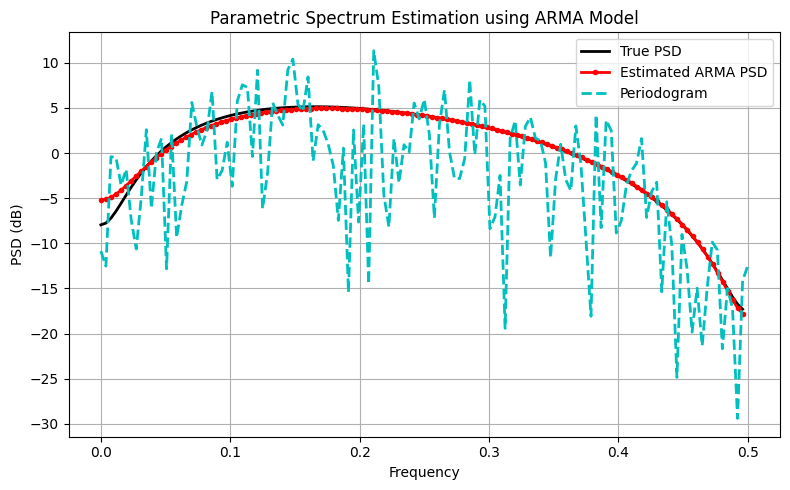

**** Periodogram
RMSE 3.754067780414849
VAR 3.735947459234252
BIAS -0.13461174235777779
****
**** Parametric Model Estimator
RMSE 0.011801183427947426
VAR 0.009747354394269466
BIAS -0.045319190567329866
****


(None, None, None, None)

In [10]:
from numpy.fft import fft, fftfreq
import matplotlib.pyplot as plt
from scipy.signal import freqz
from statsmodels.tsa.arima.model import ARIMA

'''
PARAMETRIC SPECTRUM ESTIMATION:

    USE MAXIMUM LIKELIHOOD TO GET ARMA PAR AND THEN USE IT
    FOR GETTING SPECTRUM
'''

# -------------------------------------------------
# 1. Generate ARMA(1,2) process
# -------------------------------------------------
np.random.seed(0)

N = 1024 // 4
fs = 1.0

# True ARMA parameters
ar_true = np.array([1, -0.5])        # A(z)
ma_true = np.array([1, 0.0, -0.8])    # B(z)


# White noise
w = np.random.randn(N)

# Generate process
from scipy.signal import lfilter
x = lfilter(ma_true, ar_true, w)

# -------------------------------------------------
# 2. Estimate ARMA(1,2) parameters from data
# -------------------------------------------------
# ARIMA(p,d,q) with d=0 gives ARMA(p,q)

model = ARIMA(x, order=(1, 0, 2))
result = model.fit()

# Estimated parameters
ar_est = np.r_[1, -result.arparams]
ma_est = np.r_[1, result.maparams]
sigma2_est = result.scale

# -------------------------------------------------
# 3. Parametric PSD from estimated ARMA model
# -------------------------------------------------
nfft = N
w, H_est = freqz(ma_est, ar_est, worN= N // 2 +1, fs=fs)
PSD_est = sigma2_est * np.abs(H_est)**2

# -------------------------------------------------
# 4. True theoretical PSD (for comparison)
# -------------------------------------------------
w, H_true = freqz(ma_true, ar_true, worN=N // 2 +1, fs=fs)
PSD_true = np.abs(H_true)**2

# -------------------------------------------------
# 5. Periodogram (for comparison)
# -------------------------------------------------
freq = fftfreq(N, d=fs)

# Add extra freq to match size
freq = np.append(freq, 0.5)
mask = freq >= 0

X = fft(x)
X = np.append(X, X[-1])
S = (1 / N) * np.abs(X)**2
S = S[mask]
freq = freq[mask]

# -------------------------------------------------
# 5. Plot
# -------------------------------------------------

plt.figure(figsize=(8,5))
plt.plot(w, 10*np.log10(PSD_true), 'k', linewidth=2, label='True PSD')
plt.plot(w, 10*np.log10(PSD_est), 'r.-', linewidth=2, label='Estimated ARMA PSD')
plt.plot(freq, 10*np.log10(S), 'c--', linewidth=2, label='Periodogram')

plt.xlabel('Frequency')
plt.ylabel('PSD (dB)')
plt.title('Parametric Spectrum Estimation using ARMA Model')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


rmse = np.average( np.abs(S-PSD_true)**2 )
var  = np.var(S-PSD_true)
bias = np.average(S-PSD_true)
print('****', 'Periodogram')
print('RMSE', rmse), print('VAR', var), print('BIAS', bias), print('****')


rmse = np.average( np.abs(PSD_est-PSD_true)**2 )
var  = np.var(PSD_est-PSD_true)
bias = np.average(PSD_est-PSD_true)
print('****', 'Parametric Model Estimator')
print('RMSE', rmse), print('VAR', var), print('BIAS', bias), print('****')

P

**Compara la estimación con el espectro real y con el periodograma. ¿Ves mejorías respecto a la estimación dada por el periodograma? Cuantifica la mejora.**

Claramente hay una gran mejora al usar un modelo paramétrico acertado. Se puede cuantificar usando cualquier metrica: RMSE, VAR, BIAS.

## La densidad espectral de un ARMA: polos y ceros

Este ejercicio es en Matlab. Ejecuta el codigo .m que genera una interfaz interactiva que permite jugar con los polos y ceros de un modelo ARMA.

P

**Describe que hace la aplicación interactiva $\texttt{ARMA_interactive.m}$ y relacionalos con los conceptos anteriores.**

La aplicacion te permite elegir la ubicación de las raices de los polinomios caracteristicos A(z) y C(z) en el plano complejo y dibuja la densidad espectral de potencia del proceso ARMA correspondiente.

Só un polo esta cerca del circulo unitario (raíz de A(z)), se concentra mas energia en esa frecuencia (con una mayor varianza en esa parte del espectro). Si el polo esta alejado del circulo unitario, la densidad espectral sera mas uniforme en las frecuencias.

Los ceros, que corresponden a las raices de C(z), tienen el efecto
opuesto.


# Técnicas de suavizado y filtrado

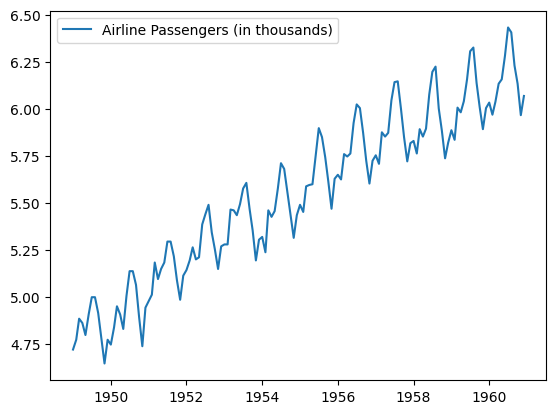

ADF statistic: -2.147030308024152
p-value: 0.5196810243754181


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# EXTRA INFO:
# from statsmodels.tsa.stattools import kpss
# kpss is a good complementary test that has a inverse hypotesis:
# ADF H0: non-stat, KPSS H0: stat
# Parece que hay otro test ADF con mayor potencia
# https://en.wikipedia.org/wiki/ADF-GLS_test

# Read the CSV file into a DataFrame
df = pd.read_csv(notebook_dir / 'airline_passengers.csv', parse_dates=['Time'], dayfirst=True)

t = df['Time']
y = df['Passengers_thousands'].to_numpy()

# Para pasar de efectos additivos a multiplicativos hay que tomar log antes
# Esto es importante ya que el metodo que suponemos en este apartado es para
# hipotesis aditiva! y = m + s + x, no y = m*s*x, que es lo que reflejan los datos
# origanales

y = np.log(y)

plt.plot(t, y, label="Airline Passengers (in thousands)")
plt.legend()
plt.show()

result = adfuller(y, regression='ct') # ct indicades posible linear trend in data


print("ADF statistic:", result[0])
print("p-value:", result[1])

# p-value < 0.05 → Stationary
# p-value ≥ 0.05 → Non-stationary



P

**Aplica el test estadístico de Dickey-Fuller aumentado (ADF) ¿Qué nos indica el $p$-valor?**

El p-valor es muy alto, $p$-valor = 0.99. Indica hypotesis $H_0:$ "no estacionario" extremadamente fuerte.

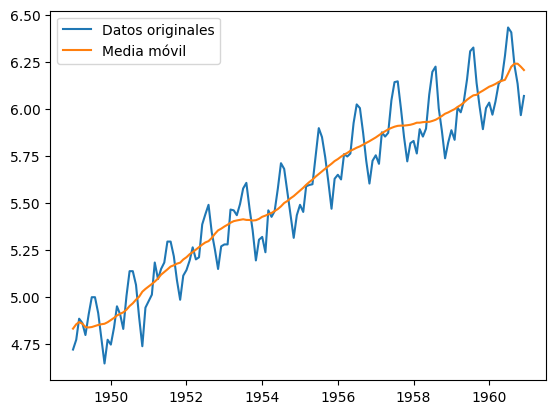

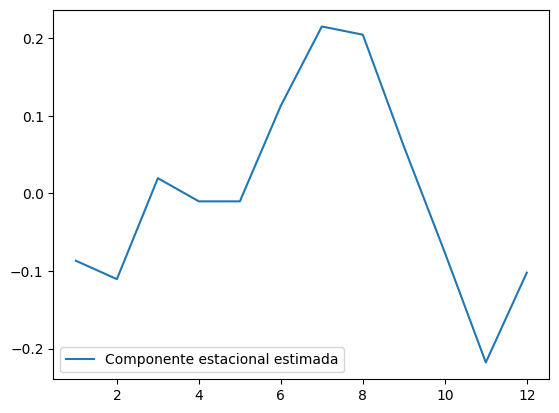

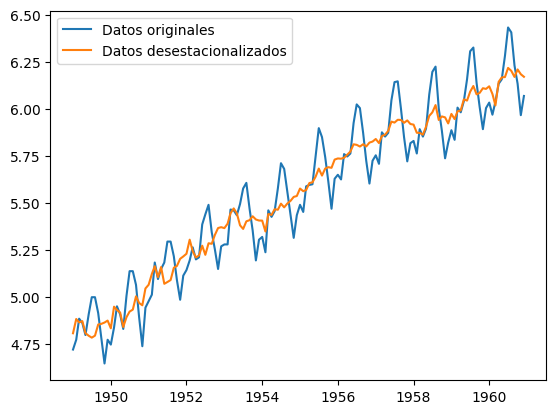

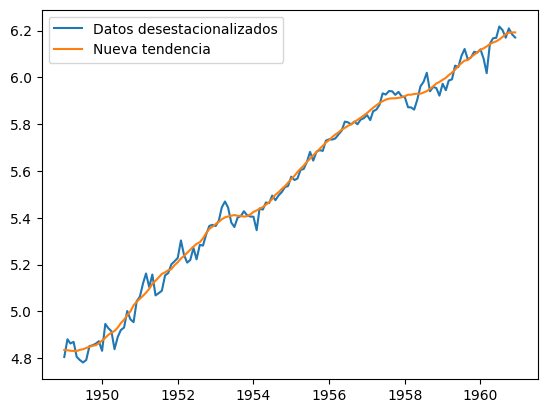

ADF statistic: -8.299645691564438
p-value: 4.050865727411859e-13


In [15]:


# Trend component extraction

# Tamaño de la ventana (número de puntos para el promedio)
window_size = 12 # si es par es -k+1 datos antes y +k datos despues
weights = np.ones(window_size) / window_size


# Anadimos elementos al final y principio para que el suavizado tenga el
# mismo tamaño que los datos originales
padded_data = np.concatenate([y, y[-6:]])
padded_data = np.concatenate([y[0:5], padded_data])


trend = np.convolve(padded_data, weights, mode='valid')
# same - same data size
# valid - only over complete data

# position of trend[i] is i + (window_size - 1) // 2 for odd and even
# sop = list( range((window_size-1)//2, len(y)- (window_size-1)//2 -1 ) )

plt.plot(t, y, label="Datos originales")
plt.plot(t, trend, label="Media móvil")
plt.legend()
plt.show()

### Seasonal component extraction
s = np.zeros(12, dtype=float)
for i in range(12):

    trend_k = trend[i::12]
    y_k = y[i::12]
    s[i] = np.average(y_k - trend_k)
s = s - np.average(s)

plt.plot(range(1,13),s,  label="Componente estacional estimada")
plt.legend()
plt.show()

s_vec = np.tile(s, len(y) // 12 )
if len(y) % 12 != 0:
    s_vec = np.concatenate( [s_vec, s[0:len(y) % 12 ]] )
y_new = y - s_vec

plt.plot(t, y, label="Datos originales")
plt.plot(t, y_new, label="Datos desestacionalizados")
plt.legend()
plt.show()

# Volvemos a estimar trend
padded_data2 = np.concatenate([y_new, y_new[-6:]])
padded_data2 = np.concatenate([y_new[0:5], padded_data2])

trend2 = np.convolve(padded_data2, weights, mode='valid')

plt.plot(t, y_new, label="Datos desestacionalizados")
plt.plot(t, trend2, label="Nueva tendencia")
plt.legend()
plt.show()


## Final

x = y_new - trend2

result = adfuller(x)

print("ADF statistic:", result[0])
print("p-value:", result[1])

# from statsmodels.tsa.stattools import acf
# from statsmodels.graphics.tsaplots import plot_acf

# acf_values = acf(x, nlags=13)
# plot_acf(x, lags=13)
# plt.show()

P

**¿Qué meses tienen una componente estacional más fuerte? ¿Y los que menos?**

Los más fuertes: Verano (Jun, Jul, Ago)

Los que menos: Feb, Nov, Oct

P

**Una vez re-estimado $m_t$, aplicamos el test ADF de nuevo a los datos sin tendencia y sin estacionalidad. ¿Qué te dice el test?**

El p-valor es muy bajo del orden de $O(10^{-13})$. Por lo que la hypotesis de estacionariedad, ahora, se cumple.